# [**Méthodes d'initialisation du GMM**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/2_1_mixture/plot_gmm_init.ipynb)<br/>([_GMM Initialization Methods_](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_init.html))

Exemples des différentes méthodes d'initialisation dans les Modèles de Mélange Gaussien

Voir [**Modèles de mélange gaussien** (2.1)](https://scikit-learn.org/stable/modules/mixture.html#gmm) pour plus d'informations sur l'estimateur.

Ici, nous générons des données d'exemple avec quatre grappes faciles à identifier. Le but de cet exemple est de montrer les quatre méthodes différentes pour le paramètre d'initialisation `init_param.`

Les quatre initialisations sont `kmeans` (par défaut), `random`, `random_from_data` et `k-means++`.

Les losanges orange représentent les centres d'initialisation pour le GMM généré par `init_param`. Le reste des données est représenté par des croix et la couleur représente la classification associée finale une fois que le GMM a terminé.

Les chiffres en haut à droite de chaque sous-tracé représentent le nombre d'itérations nécessaires pour que le `GaussianMixture` converge et le temps relatif pris pour l'exécution de la partie d'initialisation de l'algorithme. Les temps d'initialisation plus courts ont tendance à avoir un plus grand nombre d'itérations pour converger.

Le temps d'initialisation est le ratio du temps pris par cette méthode par rapport au temps pris par la méthode kmeans par défaut. Comme vous pouvez le constater, toutes les trois méthodes alternatives prennent moins de temps pour s'initialiser par rapport à kmeans.

Dans cet exemple, lorsque le modèle est initialisé avec `random_from_data` ou `random`, il faut plus d'itérations pour converger. Ici, `k-means++` fait un bon travail en termes de faible temps d'initialisation et d'un faible nombre d'itérations pour converger dans [**`GaussianMixture`**](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).

Automatically created module for IPython interactive environment


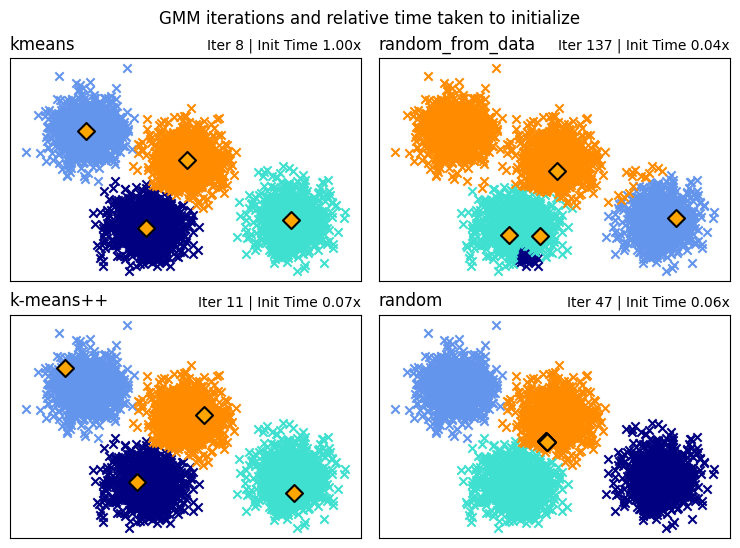

In [1]:
# Author: Gordon Walsh <gordon.p.walsh@gmail.com>
# Data generation code from Jake Vanderplas <vanderplas@astro.washington.edu>

from timeit import default_timer as timer

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets._samples_generator import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.utils.extmath import row_norms

print(__doc__)

# Generate some data

X, y_true = make_blobs(n_samples=4000, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1]

n_samples = 4000
n_components = 4
x_squared_norms = row_norms(X, squared=True)


def get_initial_means(X, init_params, r):
    # Run a GaussianMixture with max_iter=0 to output the initialization means
    gmm = GaussianMixture(
        n_components=4, init_params=init_params, tol=1e-9, max_iter=0, random_state=r
    ).fit(X)
    return gmm.means_


methods = ["kmeans", "random_from_data", "k-means++", "random"]
colors = ["navy", "turquoise", "cornflowerblue", "darkorange"]
times_init = {}
relative_times = {}

plt.figure(figsize=(4 * len(methods) // 2, 6))
plt.subplots_adjust(
    bottom=0.1, top=0.9, hspace=0.15, wspace=0.05, left=0.05, right=0.95
)

for n, method in enumerate(methods):
    r = np.random.RandomState(seed=1234)
    plt.subplot(2, len(methods) // 2, n + 1)

    start = timer()
    ini = get_initial_means(X, method, r)
    end = timer()
    init_time = end - start

    gmm = GaussianMixture(
        n_components=4, means_init=ini, tol=1e-9, max_iter=2000, random_state=r
    ).fit(X)

    times_init[method] = init_time
    for i, color in enumerate(colors):
        data = X[gmm.predict(X) == i]
        plt.scatter(data[:, 0], data[:, 1], color=color, marker="x")

    plt.scatter(
        ini[:, 0], ini[:, 1], s=75, marker="D", c="orange", lw=1.5, edgecolors="black"
    )
    relative_times[method] = times_init[method] / times_init[methods[0]]

    plt.xticks(())
    plt.yticks(())
    plt.title(method, loc="left", fontsize=12)
    plt.title(
        "Iter %i | Init Time %.2fx" % (gmm.n_iter_, relative_times[method]),
        loc="right",
        fontsize=10,
    )
plt.suptitle("GMM iterations and relative time taken to initialize")
plt.show()